In [ ]:
import keras
from keras.datasets import fashion_mnist   #dataset
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
NUM_CLASSES = 10
# taille du lot et nombre d'epochs
BATCH_SIZE = 128
epochs = 8
# dimension d'image
img_rows, img_cols = 28, 28
# téléchargement de la base
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# mise en forme selon la structure requise par le bakend (TF)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
# mise à l'échelle
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# conversion classes --> binary class matrices. One-hot encoding
# 3 => 0 0 0 1 0 0 0 0 0 0 and 1 => 0 1 0 0 0 0 0 0 0 0
y_train = np_utils.to_categorical(y_train, NUM_CLASSES)
y_test = np_utils.to_categorical(y_test, NUM_CLASSES)

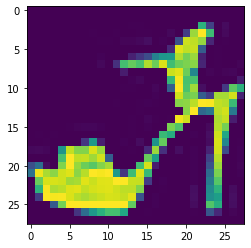

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[9, :, :, 0])


In [ ]:
input_shape = (28,28,1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu')) #32 filtre
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
input_shape = x_train.shape
input_shape

(60000, 28, 28, 1)

In [ ]:
# 3) compiler le modèle (maximiser accuracy)
import tensorflow as tf
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=tf.keras.optimizers.Adadelta(), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

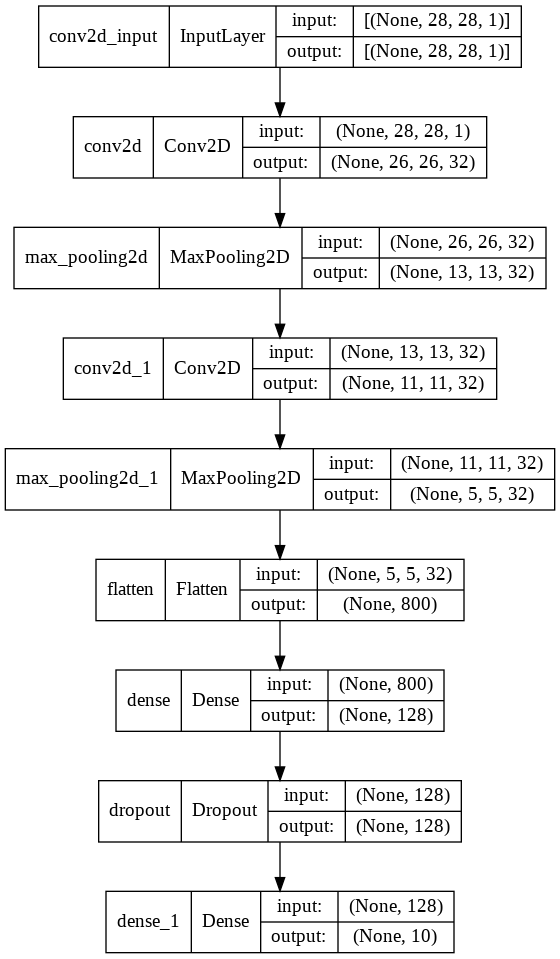

In [ ]:
model.summary() # résumé
plot_model(model, show_shapes=True, rankdir='TB', to_file='fashion_mnist.png' )

In [ ]:
# 4) apprentissage & validation après chaque epoch
# retour : history (historique de loss & accuracy pour chaque epoch)
hist = model.fit(x_train, y_train, BATCH_SIZE, epochs = epochs, verbose= 1, validation_data=(x_test, y_test))

Epoch 1/8
469/469 [==============================] - 38s 79ms/step - loss: 2.3113 - accuracy: 0.0981 - val_loss: 2.2959 - val_accuracy: 0.1654
Epoch 2/8
469/469 [==============================] - 37s 78ms/step - loss: 2.2909 - accuracy: 0.1246 - val_loss: 2.2766 - val_accuracy: 0.1895
Epoch 3/8
469/469 [==============================] - 37s 78ms/step - loss: 2.2720 - accuracy: 0.1498 - val_loss: 2.2587 - val_accuracy: 0.1951
Epoch 4/8
469/469 [==============================] - 37s 78ms/step - loss: 2.2557 - accuracy: 0.1718 - val_loss: 2.2407 - val_accuracy: 0.2085
Epoch 5/8
469/469 [==============================] - 37s 79ms/step - loss: 2.2378 - accuracy: 0.1910 - val_loss: 2.2217 - val_accuracy: 0.2313
Epoch 6/8
469/469 [==============================] - 37s 79ms/step - loss: 2.2182 - accuracy: 0.2117 - val_loss: 2.2014 - val_accuracy: 0.2595
Epoch 7/8
469/469 [==============================] - 37s 79ms/step - loss: 2.1996 - accuracy: 0.2347 - val_loss: 2.1795 - val_accuracy: 0.3098

Test loss: 2.1555144786834717
Test accuracy: 0.359499990940094


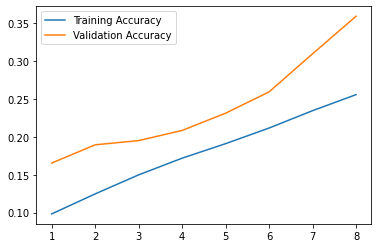

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# graphique
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))
plt.plot(epoch_list, hist.history['accuracy'])
plt.plot(epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()